In [ ]:
"""
Some resources.
"""
#https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
#https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
#https://medium.com/analytics-vidhya/removing-outliers-understanding-how-and-what-behind-the-magic-18a78ab480ff#:~:text=Removing%20Outliers%20using%20Standard%20Deviation,is%20Normally%2FGaussian%20distributed).
#https://www.machinelearningplus.com/statistics/mahalanobis-distance/
#Amazing guide on how to clean data: https://towardsdatascience.com/how-to-clean-your-data-in-python-8f178638b98d
#https://www.geeksforgeeks.org/z-score-for-outlier-detection-python/
#https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
#https://stackoverflow.com/questions/30459485/replacing-row-values-in-pandas
#https://builtin.com/machine-learning/pca-in-python
#https://www.geeksforgeeks.org/learning-model-building-scikit-learn-python-machine-learning-library/
#https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/

In [ ]:
"""
Making the dataframe.
"""
from google.colab import drive
import pandas as pd

drive.mount('/content/drive/')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/smoking_driking_dataset_Ver01.csv')

Mounted at /content/drive/


In [ ]:
df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


In [ ]:
"""
Looking for null values.
"""
for _ in df:
  bool_series = pd.isnull(df[_])
  df[bool_series]

#There's no missing values!

We can detect outliers using the Z-score or Inter-quartile Range methods.

In [ ]:
"""
Finding outliers with Z-score.
"""
import numpy as np

#I'll use the Z-score method to find outliers in the dataset.
#Let's make mean and std dictionaries, each of which contain the means and standard deviations of each column in df.
mean = {}
std = {}

cols = [_ for _ in df.columns]
cols.remove("sex")
cols.remove("SMK_stat_type_cd")
cols.remove("DRK_YN")

for _ in cols:
  mean[_] = np.mean(df[_])
  std[_] = np.std(df[_])
#print(mean, std)

threshold = 3 #I'm setting the threshold to defining an outlier as 3 standard deviations away from the mean
outliers_z = {} #outliers_z is a dictionary of lists, where the key is the column name, and values are the list of rows.
#outlier_info = {}
for col in cols:
  outliers_z[col] = []
  index = 0
  for ele in df[col]:
    z = (ele - mean[col]) / std[col]
    if z > threshold:
        outliers_z[col].append((z, index))
        #outlier_info[index] = ""
    index += 1

<ipython-input-29-650cb822a4fa>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

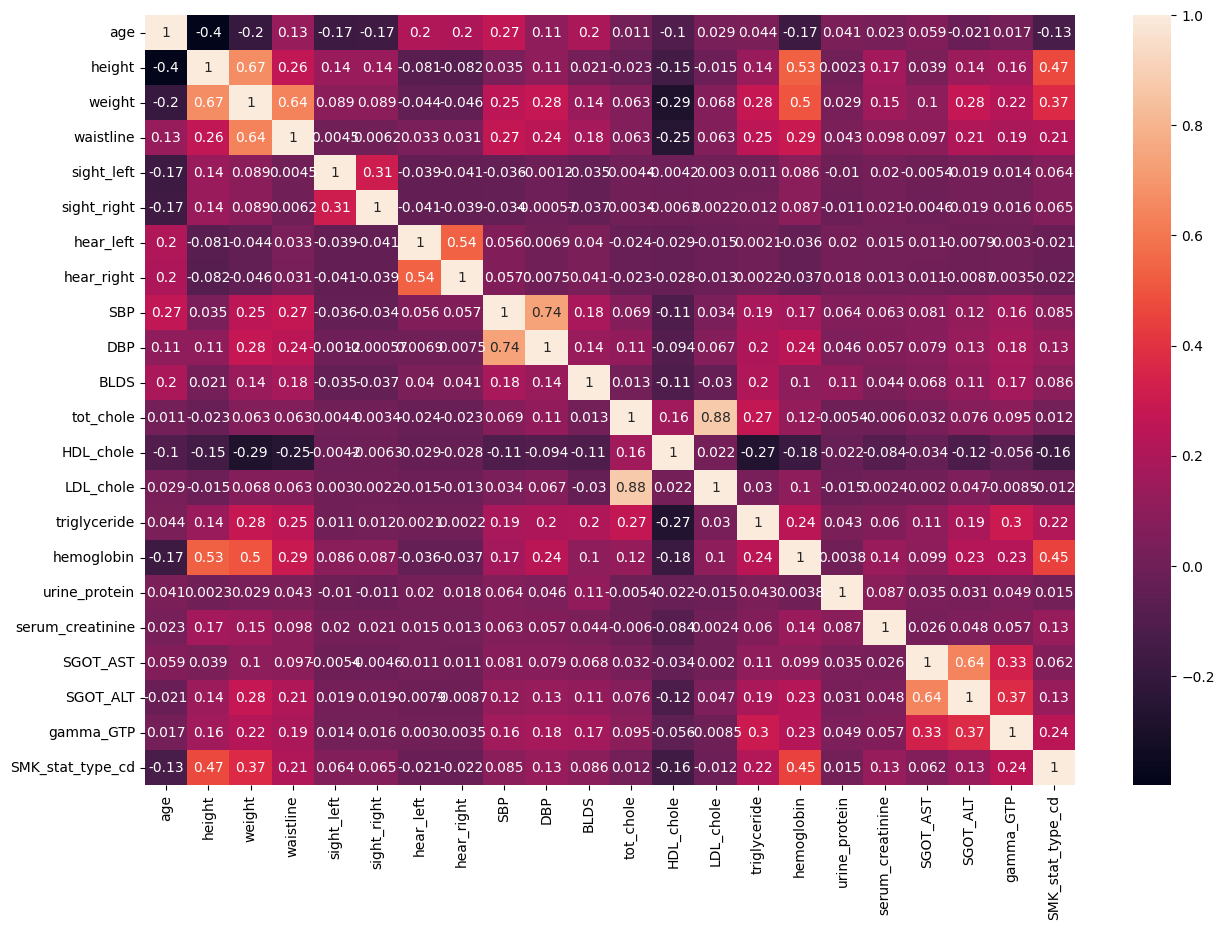

In [ ]:
"""
Generating correlation matrix.
"""
import seaborn as sn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (15, 10))
idx = [_ for _ in range(25)]

corr = df.corr()
sn.heatmap(corr, annot = True)

We see correlations between:
1. Height and weight
2. Waistline and weight
3. tot_chole and LDL_chole
4. SBP and DBP
5. SGOT_AST and SGOT_ALT
6. Height and SMK_stat_type_cd
7. Weight and SMK_stat_type_cd
8. Hemoglobin and SMK_stat_type_cd

Let's visualise these correlations with scatterplots.

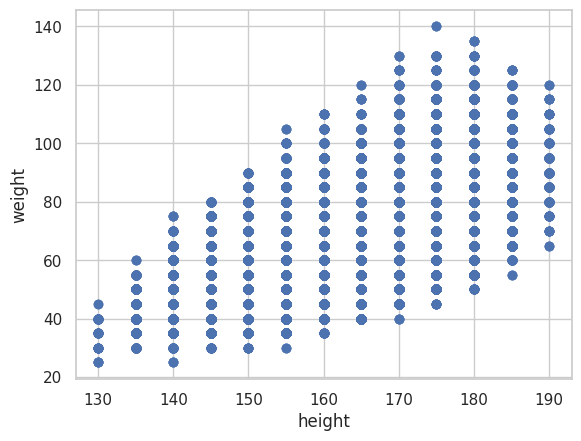

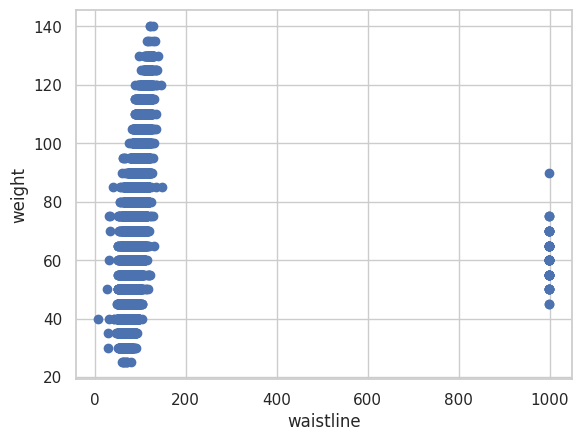

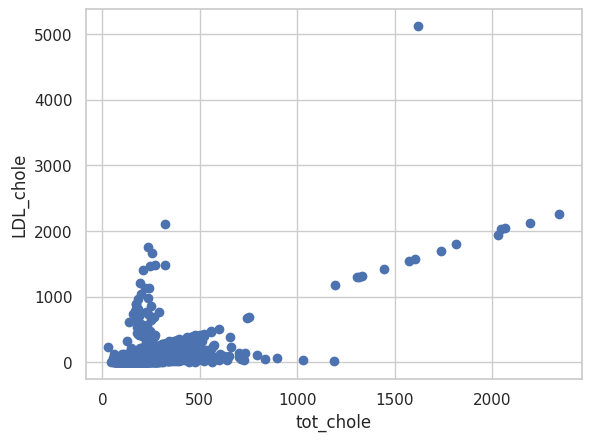

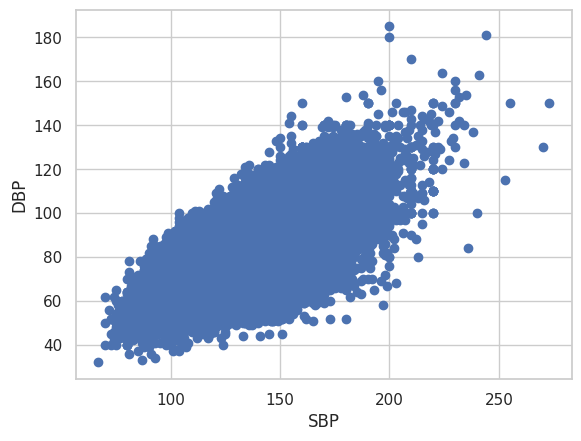

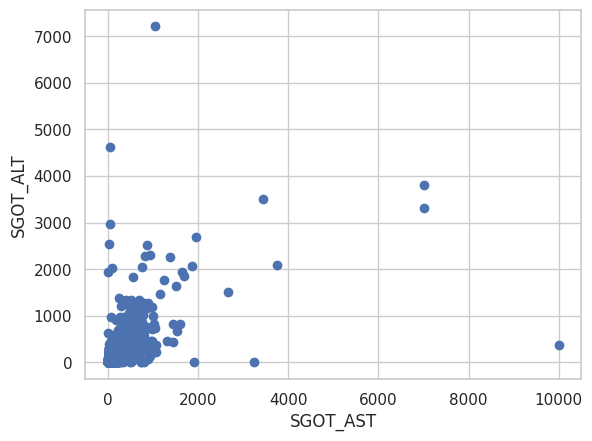

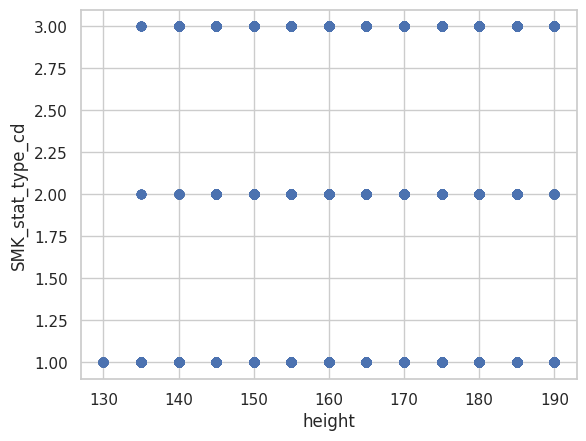

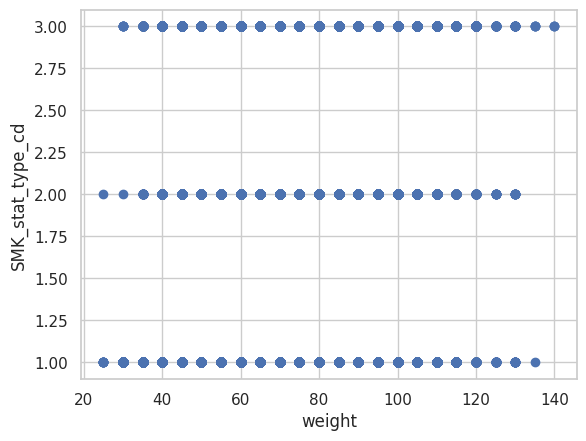

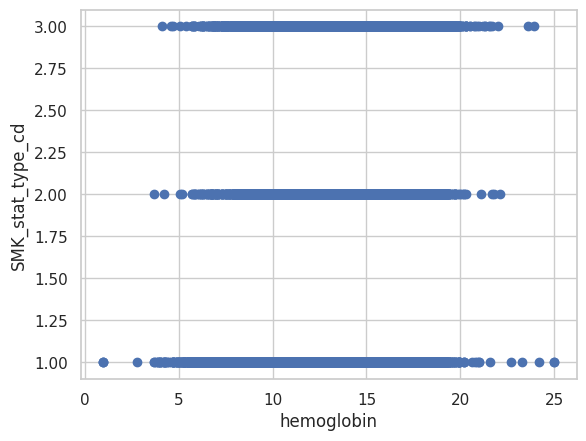

In [ ]:
"""
Making scatterplots.
"""
plt.scatter(df["height"], df["weight"])
plt.xlabel("height")
plt.ylabel("weight")
plt.show()
plt.scatter(df["waistline"], df["weight"])
plt.xlabel("waistline")
plt.ylabel("weight")
plt.show()
plt.scatter(df["tot_chole"], df["LDL_chole"])
plt.xlabel("tot_chole")
plt.ylabel("LDL_chole")
plt.show()
plt.scatter(df["SBP"], df["DBP"])
plt.xlabel("SBP")
plt.ylabel("DBP")
plt.show()
plt.scatter(df["SGOT_AST"], df["SGOT_ALT"])
plt.xlabel("SGOT_AST")
plt.ylabel("SGOT_ALT")
plt.show()
plt.scatter(df["height"], df["SMK_stat_type_cd"])
plt.xlabel("height")
plt.ylabel("SMK_stat_type_cd")
plt.show()
plt.scatter(df["weight"], df["SMK_stat_type_cd"])
plt.xlabel("weight")
plt.ylabel("SMK_stat_type_cd")
plt.show()
plt.scatter(df["hemoglobin"], df["SMK_stat_type_cd"])
plt.xlabel("hemoglobin")
plt.ylabel("SMK_stat_type_cd")
plt.show()

Boxplots can help us detect outliers too.

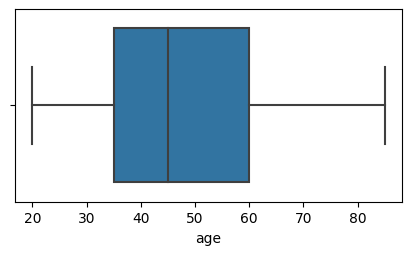

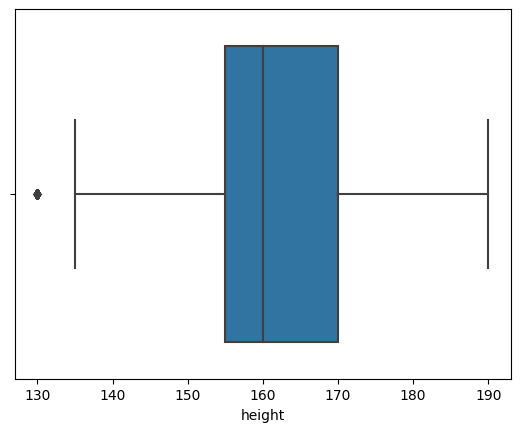

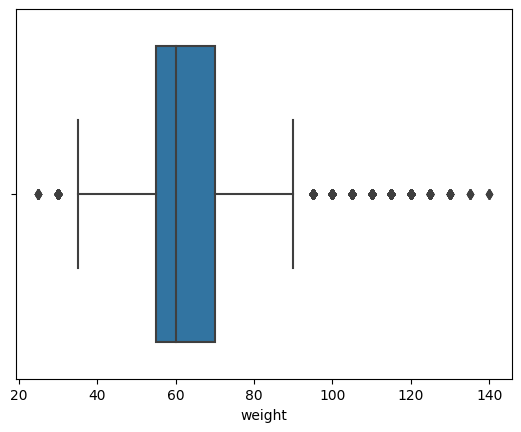

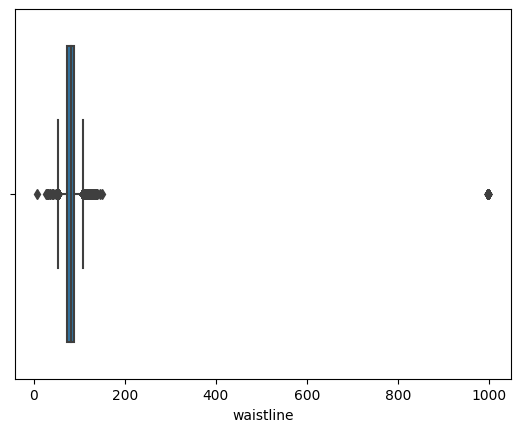

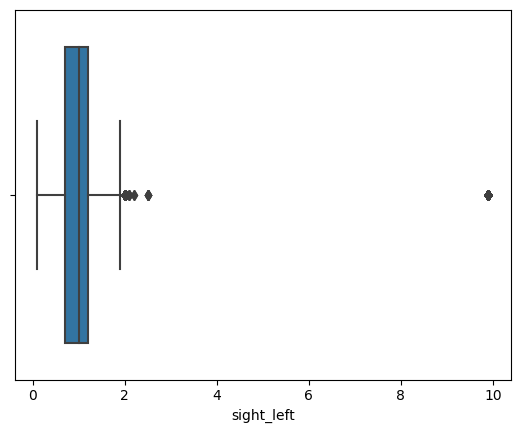

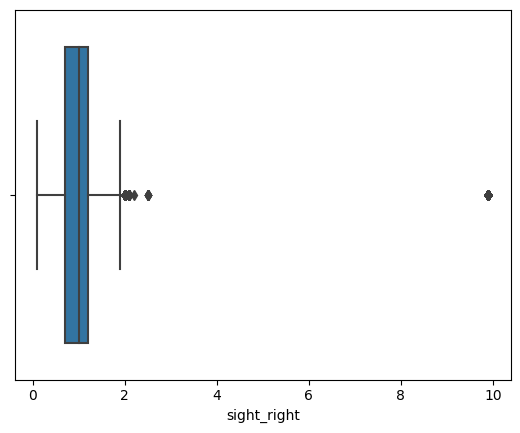

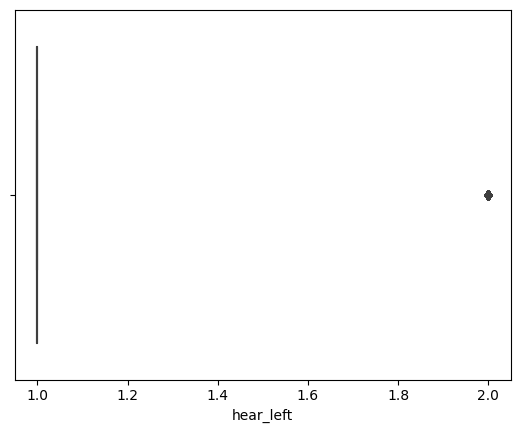

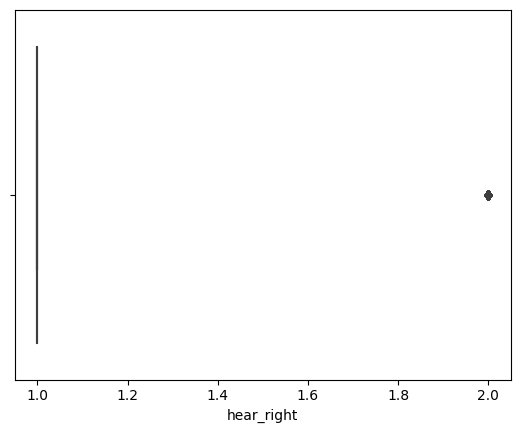

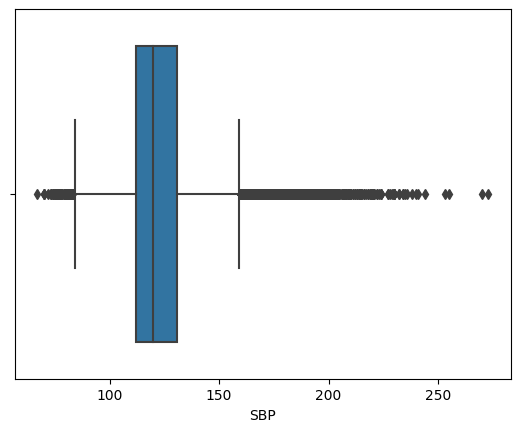

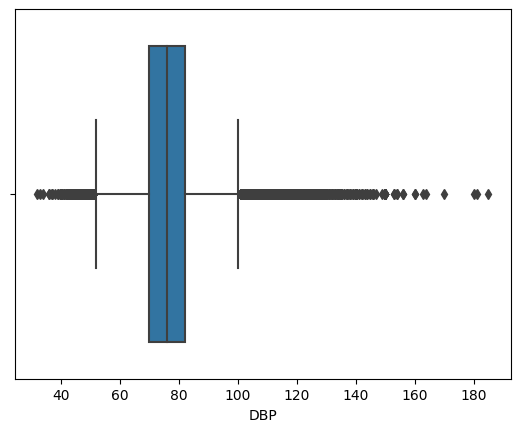

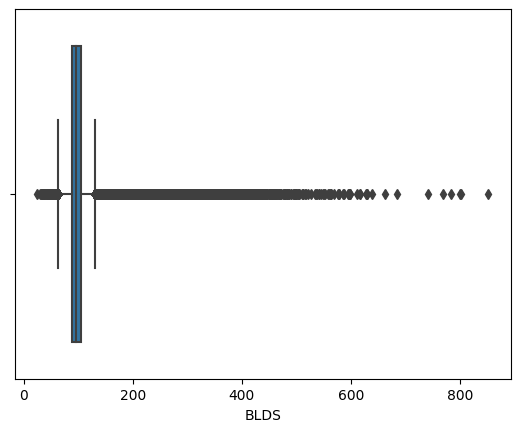

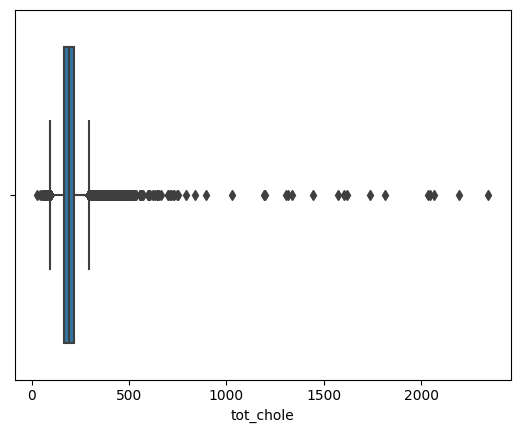

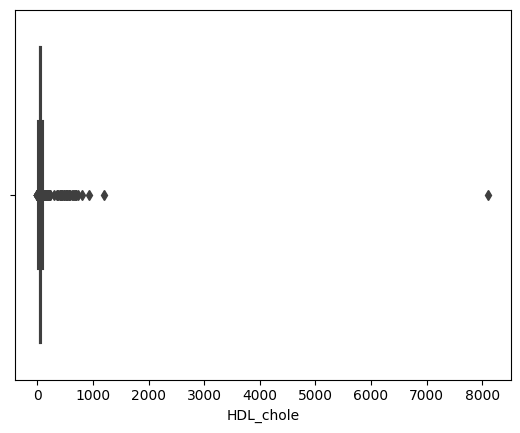

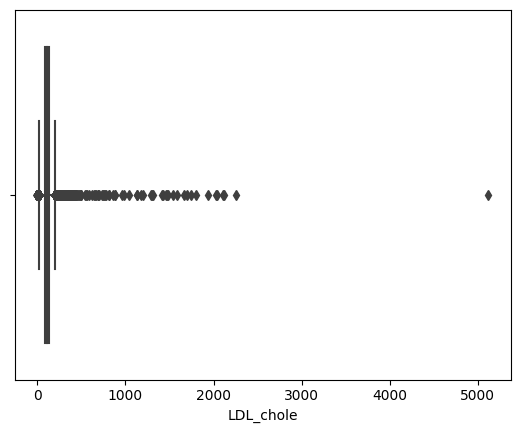

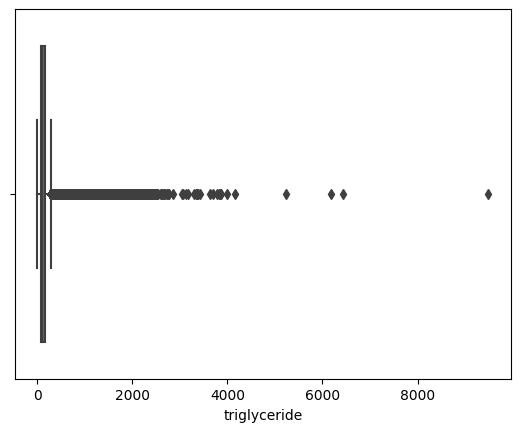

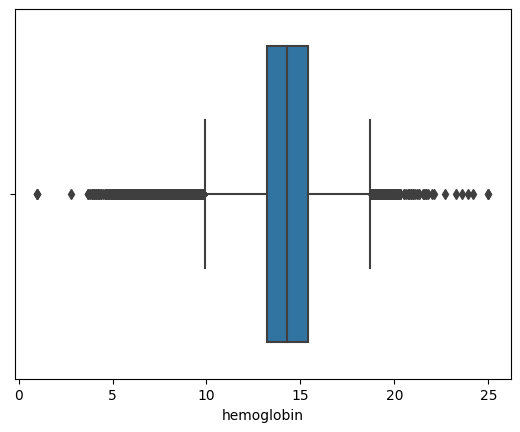

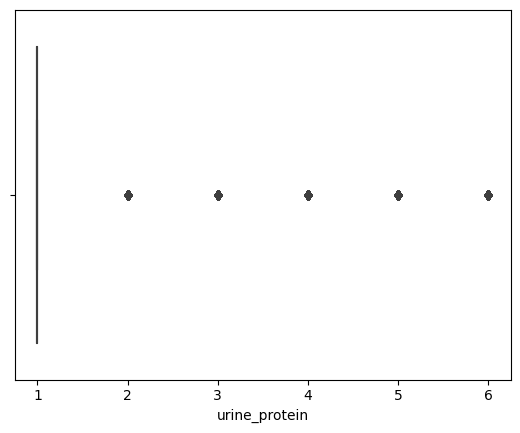

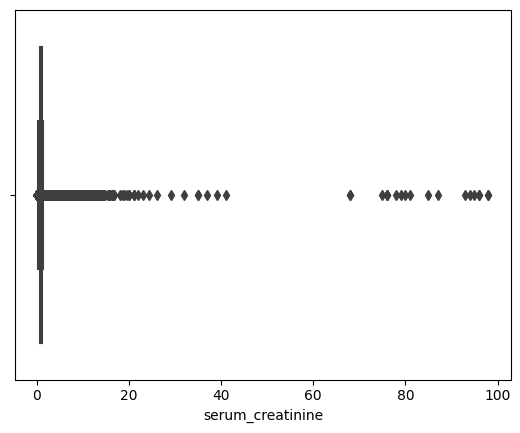

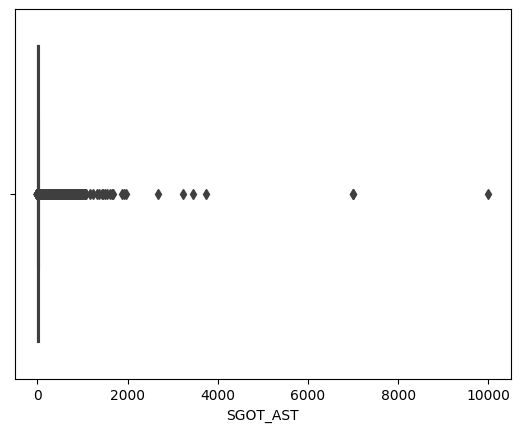

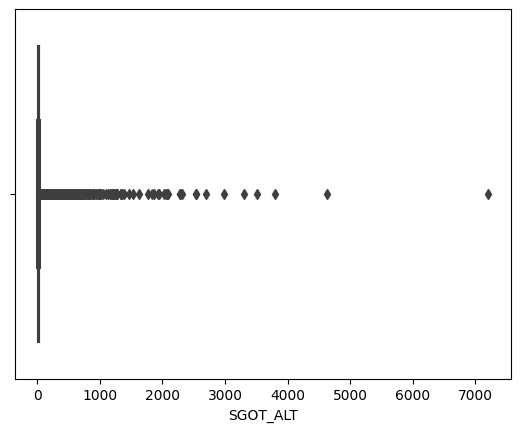

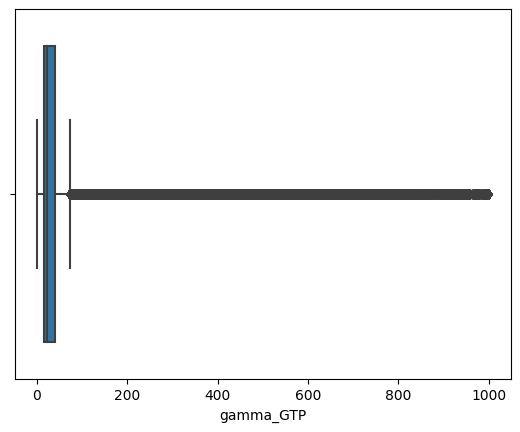

In [ ]:
"""
Making boxplots.
"""
fig = plt.figure(figsize=(5,2.5))
for col in cols:
  sn.boxplot(x = df[col])
  plt.show()

In [ ]:
"""
Finding outliers with Interquartile Range.
"""
iqr_df = df.copy(deep = True)

#Let's convert 'Male' and 'Female' to 0 and 1, respectively, and 'Y' and 'N' to 1 and 0, respectively.
iqr_df = iqr_df.replace('Male', 0)
iqr_df = iqr_df.replace('Female', 1)
iqr_df = iqr_df.replace('Y', 1)
iqr_df = iqr_df.replace('N', 0)

Q1 = np.percentile(iqr_df, 25, interpolation = 'midpoint')
Q3 = np.percentile(iqr_df, 75, interpolation = 'midpoint')

IQR = Q3 - Q1

low_lim = Q1 - 3 * IQR
up_lim = Q3 + 3 * IQR

outliers_iqr = {}
for col in iqr_df:
  outliers_iqr[col] = []
  index = 0
  for ele in iqr_df[col]:
    if ((ele > up_lim) or (ele < low_lim)):
      outliers_iqr[col].append(index)
    index += 1

<ipython-input-7-db1e716ae9ce>:12: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(iqr_df, 25, interpolation = 'midpoint')
<ipython-input-7-db1e716ae9ce>:13: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(iqr_df, 75, interpolation = 'midpoint')


We can handle outliers by either dropping them, or imputing them.

In [ ]:
"""
Dropping outlier rows.
"""
drop_rows = []
for col in outliers_z:
  for ele in outliers_z[col]:
    drop_rows.append(ele[1])
df_with_dropped_outliers_z = df.drop(drop_rows)

drop_rows = []
for col in outliers_iqr:
  for ele in outliers_iqr[col]:
    drop_rows.append(ele)
df_with_dropped_outliers_iqr = df.drop(drop_rows)

#Let's convert 'Male' and 'Female' to 0 and 1, respectively, and 'Y' and 'N' to 1 and 0, respectively.
df_with_dropped_outliers_z = df_with_dropped_outliers_z.replace('Male', 0)
df_with_dropped_outliers_z = df_with_dropped_outliers_z.replace('Female', 1)
df_with_dropped_outliers_z = df_with_dropped_outliers_z.replace('Y', 1)
df_with_dropped_outliers_z = df_with_dropped_outliers_z.replace('N', 0)

df_with_dropped_outliers_iqr = df_with_dropped_outliers_iqr.replace('Male', 0)
df_with_dropped_outliers_iqr = df_with_dropped_outliers_iqr.replace('Female', 1)
df_with_dropped_outliers_iqr = df_with_dropped_outliers_iqr.replace('Y', 1)
df_with_dropped_outliers_iqr = df_with_dropped_outliers_iqr.replace('N', 0)

In [ ]:
"""
Transforming outliers with imputation.
"""
from sklearn.impute import SimpleImputer

def impute(df, strat, outliers):
  imputed_df = df.copy(deep = True)

  #Replacing outlier cells with null values.
  for col in outliers:
    for ele in outliers[col]:
      try:
        imputed_df[col][ele[1]] = np.nan
      except TypeError:
        imputed_df[col][ele] = np.nan

  #Let's convert 'Male' and 'Female' to 0 and 1, respectively, and 'Y' and 'N' to 1 and 0, respectively.
  imputed_df = imputed_df.replace('Male', 0)
  imputed_df = imputed_df.replace('Female', 1)
  imputed_df = imputed_df.replace('Y', 1)
  imputed_df = imputed_df.replace('N', 0)

  imputer = SimpleImputer(missing_values = np.nan, strategy = strat)
  imputer = imputer.fit(imputed_df)

  # Imputing the data
  imputed_df = pd.DataFrame(imputer.transform(imputed_df))
  imputed_df.columns = ['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN']

  return imputed_df

mean_imputed_df_z = impute(df, "mean", outliers_z)
median_imputed_df_z = impute(df, "median", outliers_z)
mean_imputed_df_iqr = impute(df, "mean", outliers_iqr)
median_imputed_df_iqr = impute(df, "median", outliers_iqr)

<ipython-input-9-c9c16617977a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imputed_df[col][ele[1]] = np.nan
<ipython-input-9-c9c16617977a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imputed_df[col][ele[1]] = np.nan
<ipython-input-9-c9c16617977a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imputed_df[col][ele] = np.nan
<ipython-input-9-c9c16617977a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [ ]:
"""
"""
from sklearn.model_selection import train_test_split

def splitting(df, target):
  X = df[df.columns[0:22]]
  y = df[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

  return X_train, X_test, y_train, y_test

We can standardise the data, as well as use Principal Component Analysis (which reduces the dimensionality of the features, here from 24 to 15, while maintaining variance in the set).

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def standardising(df, target, prin_comp = True):
  scaler = StandardScaler()
  X_train, X_test, y_train, y_test = splitting(df, target)

  # Fit on training set only.
  scaler.fit(X_train)

  # Apply transform to both the training set and the test set.
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  # Make an instance of the Model
  if prin_comp:
    pca = PCA(.95)

    pca.fit(X_train)

    X_train = pd.DataFrame(pca.transform(X_train))
    X_test = pd.DataFrame(pca.transform(X_test))

  return X_train, X_test, y_train, y_test

**Implementing models:**

In [ ]:
!pip install -U scikit-multiflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.6/450.6 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-multiflow: filename=scikit_multiflow-0.5.3-cp310-cp310-linux_x86_64.whl size=1254679 sha256=4635df51ba07d1b711aab26e37d6413c8d2f51fa78a70a4c25d533411548e926
  Stored in directory: /root/.cache/pip/wheels/6e/1b/56/45b17a6cf203d98000a45976cb0dd0c4c3f11960e6a505f231
Successfully built scikit-multiflow


The _Hoeffding tree_ algorithm was made for online ML and is based on incremental learning, i.e. the algorithm learns from a continuous data stream, rather than loading the entire dataset into memory at once.

This results in much faster computation times as compared to other algorithms.

In [ ]:
"""
Hoeffding Tree
"""
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.data import DataStream

def hoeffding_fn(df, target):
  class_index = len(df.columns) - 2
  feature_names = list(df.columns[:-2])

  data_stream = DataStream(data=df, target_idx=class_index)
  n_samples = 0
  correct_cnt = 0
  max_samples = df.shape[0]
  ht = HoeffdingTreeClassifier()

  X_train, X_test, y_train, y_test = standardising(df, target)

  while n_samples < max_samples and data_stream.has_more_samples():
      batch_X, batch_y = data_stream.next_sample()
      y_pred = ht.predict(X_train)
      if y_train[0] == y_pred[0]:
          correct_cnt += 1
      ht = ht.partial_fit(batch_X, batch_y)
      n_samples += 1

  print('{} samples for analysis.'.format(n_samples))
  print('accuracy: {}'.format(correct_cnt / n_samples))

hoeffding_fn(median_imputed_df_z, 'DRK_YN')

991346 samples for analysis.
accuracy: 0.7217459897956919


991346 samples for analysis.

Accuracy: 0.7217459897956919


Again, hyperparameter tuning should be done for Hoeffding tree. Unfortunately, the commands are running too slow on Colab, so I'm not doing it here.

We can simply change the hyperparameters (like grace_period, split_criterion, split_confidence, leaf_prediction, etc.) and see how it affects the accuracy and speed.

Next, we'll tune the hyperparameters for the _Perceptron_ algorithm, using GridSearchCV. GridSearchCV takes the estimator, the list of hyperparameters you wish to tune, and a set of values that each hyperparameter can take.

It checks every possible combination of hyperparameter values and gives you the best combination, along with its accuracy.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron

def perc_tuning(df, target):
  # Define the hyperparameters and their respective values to search
  param_grid = {
      'penalty': ['l2', 'l1', 'elasticnet'],
      'alpha': [0.0001, 0.001, 0.01],
      'max_iter': [100, 500, 1000]
  }
  X_train, X_test, y_train, y_test = standardising(df, target)

  # Create an instance of the classifier
  perceptron = Perceptron()

  # Create a GridSearchCV object
  grid_search = GridSearchCV(estimator=perceptron, param_grid=param_grid, scoring='accuracy', cv=3)

  # Fit the grid search to your data
  grid_search.fit(X_train, y_train)

  # Get the best hyperparameters
  best_params = grid_search.best_params_
  print("Best Hyperparameters:", best_params)

  # Get the best model
  best_model = grid_search.best_estimator_

  # Evaluate the best model on the test data
  accuracy = best_model.score(X_test, y_test)
  print("Accuracy on Test Data:", accuracy)

We do the same hyperparameter checking for the _Logistic Regression_ algorithm.

In [ ]:
from sklearn.linear_model import LogisticRegression

def log_reg_tuning(df, target):
  # Define the hyperparameters and their respective values to search
  param_grid = {
      'C': [0.001, 0.01, 0.1, 1, 10],  # List of regularization strengths (inverse of C)
      'penalty': ['l1', 'l2', 'elasticnet'],         # Regularization type (choose one)
      #'cv': [3, 5, 10],                # Number of cross-validation folds
      'solver': ['sag', 'saga']           # Optimization algorithm (choose one)
  }

  X_train, X_test, y_train, y_test = standardising(df, target)

  # Create an instance of the classifier
  clf = LogisticRegression(random_state = 0)

  # Create a GridSearchCV object
  grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=3)

  # Fit the grid search to your data
  grid_search.fit(X_train, y_train)

  # Get the best hyperparameters
  best_params = grid_search.best_params_
  print("Best Hyperparameters:", best_params)

  # Get the best model
  best_model = grid_search.best_estimator_

  # Evaluate the best model on the test data
  accuracy = best_model.score(X_test, y_test)
  print("Accuracy on Test Data:", accuracy)

#log_reg_tuning(median_imputed_df_z, 'DRK_YN')

#Best Hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'sag'}
#Accuracy on Test Data: 0.7149643124608354

And the same for _Stochastic Gradient Descent_.

In [ ]:
from sklearn.linear_model import SGDClassifier

def sgd_tuning(df, target):
  X_train, X_test, y_train, y_test = standardising(df, target)

  # Define the hyperparameters and their possible values
  param_grid = {
      'loss' : ['log', 'log_loss', 'hinge'],           # Loss function for logistic regression
      'penalty' : ['l2', 'l1', 'elasticnet', None],         # Regularization type ('l1', 'l2', 'elasticnet')
      'alpha' : [0.001, 0.01, 0.1],        # Regularization strength
      'max_iter' : [1000, 10000, 100],        # Maximum number of iterations
  }
  # Create an instance of the classifier
  clf = SGDClassifier(random_state = 42)

  # Create a GridSearchCV object
  grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=3)

  # Fit the grid search to your data
  grid_search.fit(X_train, y_train)

  # Get the best hyperparameters
  best_params = grid_search.best_params_
  print("Best Hyperparameters:", best_params)

  # Get the best model
  best_model = grid_search.best_estimator_

  # Evaluate the best model on the test data
  accuracy = best_model.score(X_test, y_test)
  print("Accuracy on Test Data:", accuracy)

#sgd_tuning(median_imputed_df_z, 'DRK_YN')

#Best Hyperparameters: {'alpha': 0.001, 'loss': 'log', 'max_iter': 1000, 'penalty': 'l2'}
#Accuracy on Test Data: 0.7148328722737624

Now, let's check which one combination of dataframes, models and hyperparameters gives us the highest accuracy for either of the two target columns.

In [ ]:
"""
Main.
"""
perc_tuning(df_with_dropped_outliers_z, 'SMK_stat_type_cd')
perc_tuning(df_with_dropped_outliers_iqr, 'SMK_stat_type_cd')
perc_tuning(mean_imputed_df_z, 'SMK_stat_type_cd')
perc_tuning(median_imputed_df_z, 'SMK_stat_type_cd')
perc_tuning(mean_imputed_df_iqr, 'SMK_stat_type_cd')
perc_tuning(median_imputed_df_iqr, 'SMK_stat_type_cd')

#Best Hyperparameters: {'alpha': 0.0001, 'max_iter': 100, 'penalty': 'elasticnet'}
#Accuracy on Test Data: 0.657723273793655

#Best Hyperparameters: {'alpha': 0.0001, 'max_iter': 100, 'penalty': 'elasticnet'}
#Accuracy on Test Data: 0.6172063199096246

#Best Hyperparameters: {'alpha': 0.0001, 'max_iter': 100, 'penalty': 'l2'}
#Accuracy on Test Data: 0.6418591144599489

#Best Hyperparameters: {'alpha': 0.001, 'max_iter': 100, 'penalty': 'l2'}
#Accuracy on Test Data: 0.6338810007794708

#Best Hyperparameters: {'alpha': 0.001, 'max_iter': 100, 'penalty': 'elasticnet'}
#Accuracy on Test Data: 0.5986733711351235

#Best Hyperparameters: {'alpha': 0.0001, 'max_iter': 100, 'penalty': 'l1'}
#Accuracy on Test Data: 0.6468996927967721

Best Hyperparameters: {'alpha': 0.0001, 'max_iter': 100, 'penalty': 'elasticnet'}
Accuracy on Test Data: 0.657723273793655
Best Hyperparameters: {'alpha': 0.0001, 'max_iter': 100, 'penalty': 'elasticnet'}
Accuracy on Test Data: 0.6172063199096246
Best Hyperparameters: {'alpha': 0.0001, 'max_iter': 100, 'penalty': 'l2'}
Accuracy on Test Data: 0.6418591144599489
Best Hyperparameters: {'alpha': 0.001, 'max_iter': 100, 'penalty': 'l2'}
Accuracy on Test Data: 0.6338810007794708
Best Hyperparameters: {'alpha': 0.001, 'max_iter': 100, 'penalty': 'elasticnet'}
Accuracy on Test Data: 0.5986733711351235
Best Hyperparameters: {'alpha': 0.0001, 'max_iter': 100, 'penalty': 'l1'}
Accuracy on Test Data: 0.6468996927967721


"\nperceptron_fn(df_with_dropped_outliers_z, 'DRK_YN')\nperceptron_fn(df_with_dropped_outliers_iqr, 'DRK_YN')\nperceptron_fn(mean_imputed_df_z, 'DRK_YN')\nperceptron_fn(median_imputed_df_z, 'DRK_YN')\nperceptron_fn(mean_imputed_df_iqr, 'DRK_YN')\nperceptron_fn(median_imputed_df_iqr, 'DRK_YN')\n"

In [ ]:
perc_tuning(df_with_dropped_outliers_z, 'DRK_YN')
perc_tuning(df_with_dropped_outliers_iqr, 'DRK_YN')
perc_tuning(mean_imputed_df_z, 'DRK_YN')
perc_tuning(median_imputed_df_z, 'DRK_YN')
perc_tuning(mean_imputed_df_iqr, 'DRK_YN')
perc_tuning(median_imputed_df_iqr, 'DRK_YN')

Best Hyperparameters: {'alpha': 0.01, 'max_iter': 100, 'penalty': 'l1'}
Accuracy on Test Data: 0.6068746112147871
Best Hyperparameters: {'alpha': 0.001, 'max_iter': 100, 'penalty': 'l2'}
Accuracy on Test Data: 0.6283218507852154
Best Hyperparameters: {'alpha': 0.0001, 'max_iter': 100, 'penalty': 'l2'}
Accuracy on Test Data: 0.686903360895016
Best Hyperparameters: {'alpha': 0.0001, 'max_iter': 100, 'penalty': 'l2'}
Accuracy on Test Data: 0.682315181341607
Best Hyperparameters: {'alpha': 0.0001, 'max_iter': 100, 'penalty': 'elasticnet'}
Accuracy on Test Data: 0.5724648091824726
Best Hyperparameters: {'alpha': 0.0001, 'max_iter': 100, 'penalty': 'elasticnet'}
Accuracy on Test Data: 0.5420898989744609


Best Hyperparameters: {'alpha': 0.01, 'max_iter': 100, 'penalty': 'l1'}
Accuracy on Test Data: 0.6068746112147871

Best Hyperparameters: {'alpha': 0.001, 'max_iter': 100, 'penalty': 'l2'}
Accuracy on Test Data: 0.6283218507852154

Best Hyperparameters: {'alpha': 0.0001, 'max_iter': 100, 'penalty': 'l2'}
Accuracy on Test Data: 0.686903360895016

Best Hyperparameters: {'alpha': 0.0001, 'max_iter': 100, 'penalty': 'l2'}
Accuracy on Test Data: 0.682315181341607

Best Hyperparameters: {'alpha': 0.0001, 'max_iter': 100, 'penalty': 'elasticnet'}
Accuracy on Test Data: 0.5724648091824726

Best Hyperparameters: {'alpha': 0.0001, 'max_iter': 100, 'penalty': 'elasticnet'}
Accuracy on Test Data: 0.5420898989744609

In [ ]:
sgd_tuning(df_with_dropped_outliers_z, 'SMK_stat_type_cd')
sgd_tuning(df_with_dropped_outliers_iqr, 'SMK_stat_type_cd')
sgd_tuning(mean_imputed_df_z, 'SMK_stat_type_cd')
sgd_tuning(median_imputed_df_z, 'SMK_stat_type_cd')
sgd_tuning(mean_imputed_df_iqr, 'SMK_stat_type_cd')
sgd_tuning(median_imputed_df_iqr, 'SMK_stat_type_cd')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  self._get_learning_rate_type(self.learning_rate)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  self._get_learning_rate_type(self.learning_rate)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  self._get_learning_rate_type(self.learning_rate)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Us

Best Hyperparameters: {'alpha': 0.001, 'loss': 'log', 'max_iter': 1000, 'penalty': None}
Accuracy on Test Data: 0.6836114813827424


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  self._get_learning_rate_type(self.learning_rate)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  self._get_learning_rate_type(self.learning_rate)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  self._get_learning_rate_type(self.learning_rate)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Us

Best Hyperparameters: {'alpha': 0.001, 'loss': 'log', 'max_iter': 1000, 'penalty': None}
Accuracy on Test Data: 0.6793648268071091


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  self._get_learning_rate_type(self.learning_rate)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  self._get_learning_rate_type(self.learning_rate)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  self._get_learning_rate_type(self.learning_rate)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Us

Best Hyperparameters: {'alpha': 0.01, 'loss': 'log', 'max_iter': 1000, 'penalty': None}
Accuracy on Test Data: 0.6743248406669825


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  self._get_learning_rate_type(self.learning_rate)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  self._get_learning_rate_type(self.learning_rate)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  self._get_learning_rate_type(self.learning_rate)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Us

Best Hyperparameters: {'alpha': 0.01, 'loss': 'log', 'max_iter': 1000, 'penalty': None}
Accuracy on Test Data: 0.6737623989362516


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  self._get_learning_rate_type(self.learning_rate)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  self._get_learning_rate_type(self.learning_rate)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  self._get_learning_rate_type(self.learning_rate)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Us

Best Hyperparameters: {'alpha': 0.01, 'loss': 'log', 'max_iter': 1000, 'penalty': None}
Accuracy on Test Data: 0.6731296519891791


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  self._get_learning_rate_type(self.learning_rate)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  self._get_learning_rate_type(self.learning_rate)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  self._get_learning_rate_type(self.learning_rate)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Us

Best Hyperparameters: {'alpha': 0.01, 'loss': 'log', 'max_iter': 1000, 'penalty': None}
Accuracy on Test Data: 0.6730012685506427


Best Hyperparameters: {'alpha': 0.001, 'loss': 'log', 'max_iter': 1000, 'penalty': None}
Accuracy on Test Data: 0.6836114813827424

Best Hyperparameters: {'alpha': 0.001, 'loss': 'log', 'max_iter': 1000, 'penalty': None}
Accuracy on Test Data: 0.6793648268071091

Best Hyperparameters: {'alpha': 0.01, 'loss': 'log', 'max_iter': 1000, 'penalty': None}
Accuracy on Test Data: 0.6743248406669825

Best Hyperparameters: {'alpha': 0.01, 'loss': 'log', 'max_iter': 1000, 'penalty': None}
Accuracy on Test Data: 0.6737623989362516

Best Hyperparameters: {'alpha': 0.01, 'loss': 'log', 'max_iter': 1000, 'penalty': None}
Accuracy on Test Data: 0.6731296519891791

Best Hyperparameters: {'alpha': 0.01, 'loss': 'log', 'max_iter': 1000, 'penalty': None}
Accuracy on Test Data: 0.6730012685506427


In [ ]:
sgd_tuning(df_with_dropped_outliers_z, 'DRK_YN')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  self._get_learning_rate_type(self.learning_rate)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  self._get_learning_rate_type(self.learning_rate)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  self._get_learning_rate_type(self.learning_rate)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Us

Best Hyperparameters: {'alpha': 0.01, 'loss': 'log', 'max_iter': 1000, 'penalty': None}
Accuracy on Test Data: 0.7098231582689061


Best Hyperparameters: {'alpha': 0.01, 'loss': 'log', 'max_iter': 1000, 'penalty': None}
Accuracy on Test Data: 0.7098231582689061


In [ ]:
sgd_tuning(df_with_dropped_outliers_iqr, 'DRK_YN')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

Best Hyperparameters: {'alpha': 0.01, 'loss': 'log', 'max_iter': 1000, 'penalty': None}
Accuracy on Test Data: 0.7121704402615794


Best Hyperparameters: {'alpha': 0.01, 'loss': 'log', 'max_iter': 1000, 'penalty': None}
Accuracy on Test Data: 0.7121704402615794

In [ ]:
sgd_tuning(mean_imputed_df_z, 'DRK_YN')

In [ ]:
sgd_tuning(median_imputed_df_z, 'DRK_YN')

In [ ]:
sgd_tuning(mean_imputed_df_iqr, 'DRK_YN')

In [ ]:
sgd_tuning(median_imputed_df_iqr, 'DRK_YN')

In [ ]:
log_reg_tuning(df_with_dropped_outliers_z, 'SMK_stat_type_cd')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following 

Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
Accuracy on Test Data: 0.6856482715720252


Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
Accuracy on Test Data: 0.6856482715720252


In [ ]:
log_reg_tuning(df_with_dropped_outliers_iqr, 'SMK_stat_type_cd')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'sag'}
Accuracy on Test Data: 0.6812009737625101


Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'sag'}
Accuracy on Test Data: 0.6812009737625101


In [ ]:
log_reg_tuning(mean_imputed_df_z, 'SMK_stat_type_cd')

In [ ]:
log_reg_tuning(median_imputed_df_z, 'SMK_stat_type_cd')

In [ ]:
log_reg_tuning(mean_imputed_df_iqr, 'SMK_stat_type_cd')

In [ ]:
log_reg_tuning(median_imputed_df_iqr, 'SMK_stat_type_cd')

In [ ]:
log_reg_tuning(df_with_dropped_outliers_z, 'DRK_YN')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Best Hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'sag'}
Accuracy on Test Data: 0.7099724517906336


Best Hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'sag'}
Accuracy on Test Data: 0.7099724517906336


In [ ]:
log_reg_tuning(df_with_dropped_outliers_iqr, 'DRK_YN')

In [ ]:
log_reg_tuning(mean_imputed_df_z, 'DRK_YN')

In [ ]:
log_reg_tuning(median_imputed_df_z, 'DRK_YN')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Best Hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'sag'}
Accuracy on Test Data: 0.7149643124608354


Best Hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'sag'}
Accuracy on Test Data: 0.7149643124608354


In [ ]:
log_reg_tuning(mean_imputed_df_iqr, 'DRK_YN')

In [ ]:
log_reg_tuning(median_imputed_df_iqr, 'DRK_YN')

Unfortunately, I wasn't able to finish executing all of the code. However, from what I could finish, the best combination for:
1. 'DRK_YN' was the logistic regression model, with a median imputed dataframe, where outliers were detected using the Z-score method.

2. 'SMK_stat_type_cd' was the SGD algorithm, with dropped outliers, which were detected using the Z-score method.
